In [2]:
import cv2
import os

import matplotlib.pyplot as plt
import numpy as np
import skimage

from matplotlib import cm
from Phase_Congruency import phasecongmono
from PIL import Image
from skimage import feature, morphology
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

In [3]:
directory = r"/Users/user/Desktop/Everimpact/road_github/Road_Detection_POC/Edge_detect_v1"

In [4]:
%run Phase_Congruency.py
from Phase_Congruency import phasecongmono

In [5]:
def phase_output(image_path):
    """
    This function returns the phase congruency output with a grayscale image as the input with its root path.
    Phase congruency is a method of edge detection which detects edges irrespective of the brightness of 
    features. The strength of edge detection can be adjusted by changing the dependent values in phasecongmono.
    The final image is converted into a uint8 format to be read by OpenCV2. 
    """
    road_img = cv2.imread(image_path)
    # grayscale using skimage
    road_gray = rgb2gray(road_img)
    # Adjust gamma stretch threshold
    contrast_img = skimage.exposure.adjust_gamma(road_img, gamma=3.8, gain=1)

    # Image thresholding using global threshold
    thresh = threshold_otsu(contrast_img)

    # Keeping values above threshold the same whereas below threshold are 0.
    contrast_img[contrast_img > thresh] = 0

    # Change the parameters nscale and minWaveLength for detecting smaller or larger objects respectively
    phaseimg = phasecongmono(
        contrast_img,
        nscale=5,
        minWaveLength=3,  # 3 is the default
        mult=2.1,  # 2.1 is the default
        sigmaOnf=0.55,
        k=15.0,
        cutOff=0.8,
        g=10.0,
        noiseMethod=-1,
        deviationGain=1.5,
    )
    # Parsing the phase output tuple of arrays
    phasecong0 = phaseimg[0]

    # Converting phasecong0 to uint8
    phasecong0_binary = (phasecong0 / (np.max(phasecong0))) * 255
    phasecong0_close = (np.round(phasecong0_binary)).astype(np.uint8)
    
    # Generating figure 2
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(road_img)
    ax[0].set_title('Input image')

    ax[1].imshow(phasecong0)
    ax[1].set_title('City edges')

    #cv2.imwrite(f"{i}/{PHASECONG}", phasecong0_close)


In [6]:
image_path = 'San_Francisco_Test/quick_example.png'

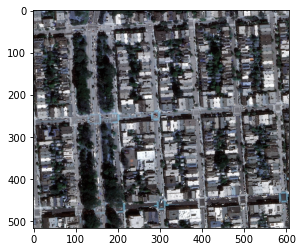

In [7]:
road_img = cv2.imread(image_path)
plt.imshow(road_img)
plt.show()

0.470703125


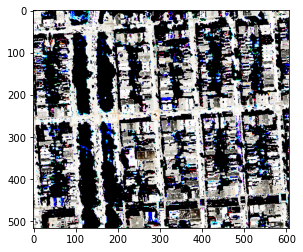

In [8]:
# Adjust gamma stretch threshold
contrast_img = skimage.exposure.adjust_gamma(road_img, gamma=5, gain=-1)

# grayscale using skimage
road_gray = rgb2gray(contrast_img)

thresh = threshold_otsu(road_gray)
print(thresh)
# Keeping values above threshold the same whereas below threshold are 0.
contrast_img[contrast_img < thresh/4] = 0
plt.imshow(contrast_img, cmap='gray')
plt.show()

In [9]:
gray = cv2.cvtColor(road_img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,150,200,apertureSize = 3)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=50,maxLineGap=20)
# for line in lines:
#     x1,y1,x2,y2 = line[0]
#     cv2.line(road_img,(x1,y1),(x2,y2),(0,255,0),2)


# cv2.imshow("edge_try", road_img)
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

In [10]:
phaseimg = phasecongmono(
        contrast_img,
        nscale=5,
        minWaveLength=0.9,  # 3 is the default
        mult=2.1,  # 2.1 is the default
        sigmaOnf=0.55,
        k=15.0,
        cutOff=0.8,
        g=10.0,
        noiseMethod=-1,
        deviationGain=1.5,
    )
# Parsing the phase output tuple of arrays
phasecong0 = phaseimg[0]

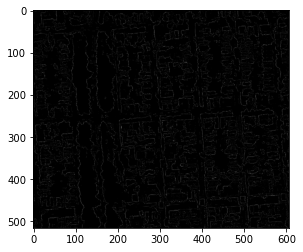

In [11]:
plt.imshow(phasecong0, cmap='gray')
plt.show()

In [ ]:
phasecong0_binary = (phasecong0) * 255
phasecong0_close = (np.round(phasecong0_binary)).astype(np.uint8)
# Filename
filename = 'phase_cong_test.png'
  
cv2.imshow("edge_try", phasecong0_binary)
cv2.waitKey(0) 
cv2.destroyAllWindows()
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, phasecong0_binary)

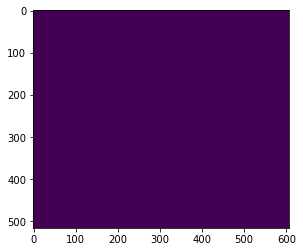

In [18]:
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
import skimage.io as io
img = io.imread(image_path)
#road_gray = rgb2gray(img)
edges = canny(road_gray, 1, 1, 12)
plt.imshow(edges)
plt.show()


lines = probabilistic_hough_line(edges, threshold=20, line_length=15,
                                 line_gap=3)


In [ ]:
# Generating figure 2.
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 6), sharex=True,
                                    sharey=True)
plt.tight_layout()

ax0.imshow(image, cmap=cm.gray)
ax0.set_title('Input image')
ax0.set_axis_off()
ax0.set_adjustable('box-forced')

ax1.imshow(edges, cmap=cm.gray)
ax1.set_title('Canny edges')
ax1.set_axis_off()
ax1.set_adjustable('box-forced')

ax2.imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax2.plot((p0[0], p1[0]), (p0[1], p1[1]))

row2, col2 = image.shape
ax2.axis((0, col2, row2, 0))

ax2.set_title('Probabilistic Hough')
ax2.set_axis_off()
ax2.set_adjustable('box-forced')

plt.show()